## Stationary check:

In [5]:
import pandas as pd

data = pd.read_csv('../prcp_monthly.csv')
data['month'] = pd.to_datetime(data['month'])
data.head()

,index,month,prcp
0,0,2001-01-01,101.400000
1,1,2001-02-01,98.200000
2,2,2001-03-01,201.200000
3,3,2001-04-01,141.200000
4,4,2001-05-01,29.233333


ACF Plot:

<Figure size 1000x600 with 0 Axes>

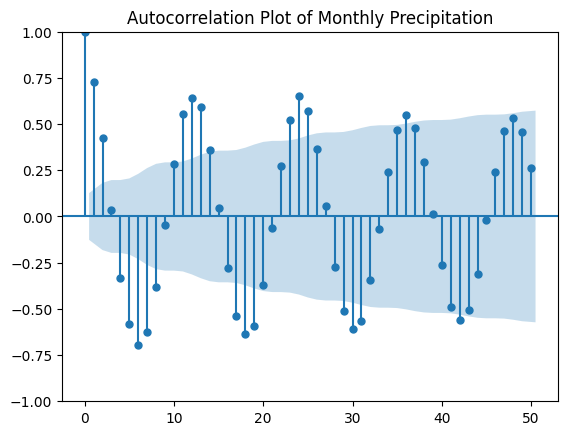

In [9]:
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(10, 6))
plot_acf(data['prcp'], lags=50)

plt.title("Autocorrelation Plot of Monthly Precipitation")
plt.show()

PACF Plot:

<Figure size 1000x600 with 0 Axes>

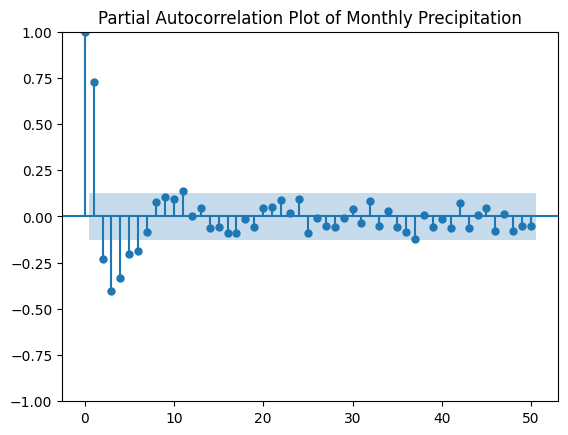

In [11]:
from statsmodels.graphics.tsaplots import plot_pacf

plt.figure(figsize=(10, 6))
plot_pacf(data['prcp'], lags=50)

plt.title("Partial Autocorrelation Plot of Monthly Precipitation")
plt.show()

ADF test:

In [6]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series):
    print('H0: Non-stationary series')
    print('H1: Stationary series\n')
    result = adfuller(series)
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}\n")
    if result[1] < 0.05:
        print('p-value < 0.05')
        print("-> Stationary series (Reject H₀)")
    else:
        print('p-value > 0.05')
        print(" -> Non-stationary series (Fail to Reject H₀)")

adf_test(data['prcp'])

H0: Non-stationary series
H1: Stationary series

ADF Statistic: -3.8645202899625875
p-value: 0.0023120418725554115

p-value < 0.05
-> Stationary series (Reject H₀)


## 1. ARIMA(p,d,q)

## 2. SARIMA(p,d,q)(P,D,Q)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error


- Due to the stationary, `d` = 0.
- Due to ACF plot: